# 🧠 Model Training & Evaluation

In this notebook, we'll:
- Load the preprocessed data
- Train a regression model (Linear Regression)
- Evaluate performance using RMSE & MAE
- Save the model for later use

In [5]:
import joblib

X_train = joblib.load("../data/processed/X_train_processed.pkl")
X_test = joblib.load("../data/processed/X_test_processed.pkl")
y_train = joblib.load("../data/processed/y_train.pkl")
y_test = joblib.load("../data/processed/y_test.pkl")

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("✅ Preprocessed data loaded successfully.")

X_train shape: (3122, 41)
y_train shape: (3122,)
X_test shape: (781, 41)
y_test shape: (781,)
✅ Preprocessed data loaded successfully.


## 📈 Train a Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 2: Predict on test set
y_pred = model.predict(X_test)

## 📊 Model Evaluation

In [7]:
# Step 3: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:,.2f}")
print(f"✅ MAE: {mae:,.2f}")
print(f"✅ R² Score: {r2:.4f}")

✅ RMSE: 737,643.44
✅ MAE: 503,255.43
✅ R² Score: 0.4432


## 💾 Save the Trained Model

In [8]:
joblib.dump(model, "../data/models/linear_regression_model.pkl")
print("✅ Model saved to models/linear_regression_model.pkl")

✅ Model saved to models/linear_regression_model.pkl


### 📈 Visualizing Model Performance: Actual vs Predicted Prices

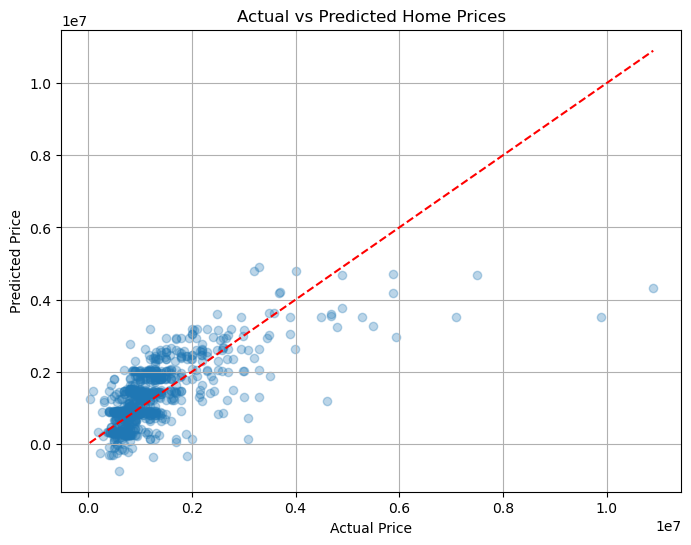

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Home Prices')
plt.grid(True)
plt.show()
